In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import LSTM , Dense #type:ignore

In [ ]:
df = pd.read_csv('time_series_data.csv')
df = df[['Close']]
df.head()

,Close
0,AAPL
1,NaN
2,72.71607208251953
3,72.00912475585938
4,72.5829086303711


In [4]:
df['Close'] = pd.to_numeric(df['Close'] , errors='coerce')
df = df.dropna()
df.head()

,Close
2,72.716072
3,72.009125
4,72.582909
5,72.241539
6,73.403648


In [6]:
# Normalize the data 
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df)


In [7]:
# create Sequences : 
def create_sequences(data , seq_len) : 
    X , y = [] , []

    for i in range(seq_len , len(data)) : 
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X) , np.array(y)

sequence_length = 60 
X , y = create_sequences(data_scaled , sequence_length)

In [8]:
X = X.reshape((X.shape[0] , X.shape[1] ,1 ))

In [9]:
# Split the data into training and test sets 
split = int(0.8 * len(X))
X_train , y_train = X[:split] , y[:split]
X_test , y_test = X[split:] , y[split:]

In [10]:
model = Sequential([
    LSTM(50 , return_sequences=True , input_shape=(X.shape[1],1)),
    LSTM(50),
    Dense(1)
])

c:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam' , 
              loss='mean_squared_error')

In [12]:
model.fit(X_train , y_train , 
          epochs = 20 ,
          batch_size = 32 ,
          verbose = 1)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.1556
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0053
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0027
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0020
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0019
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0017
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0016
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0016
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0015
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0014
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0014
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0012
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0012
Epoc

In [13]:
predicte = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicte)
actual_prize = scaler.inverse_transform(y_test.reshape(-1,1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


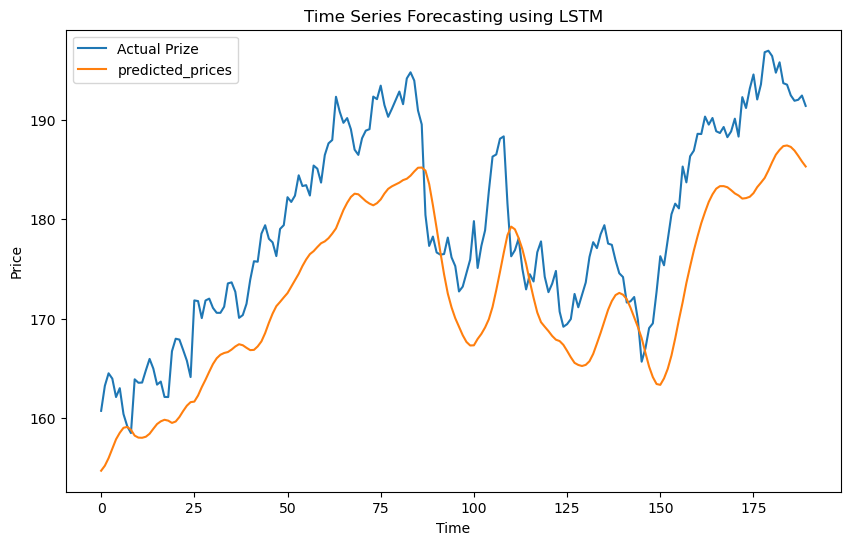

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(actual_prize , label = 'Actual Prize')
plt.plot(predicted_prices , label='predicted_prices')
plt.title('Time Series Forecasting using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
# --------- 📈 Predict Future n Values ---------
future_steps = 5 
last_sequence = data_scaled[-sequence_length:]
future_predictions = []

for _ in range(future_steps) :
    input_seq = last_sequence.reshape(1 , sequence_length , 1)
    next_pred = model.predict(input_seq , verbose=0)
    future_predictions.append(next_pred[0,0])
    last_sequence = np.append(last_sequence[1:] , next_pred , axis = 0 )

# Inverse transform future predictions
future_predictions = np.array(future_predictions).reshape(-1,1)
future_predictions = scaler.inverse_transform(future_predictions)


    

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


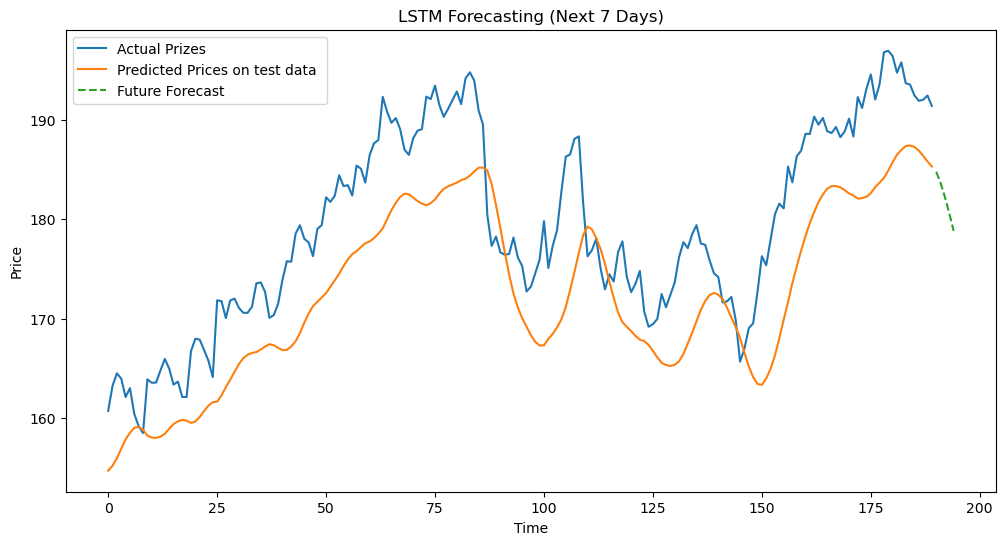

In [20]:
predicte = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicte)
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

# Plot every thing 
plt.figure(figsize=(12,6))
plt.plot(actual_prices , label = "Actual Prizes")
plt.plot(predicted_prices , label = "Predicted Prices on test data ")
plt.plot(range(len(actual_prices) , len(actual_prices) + future_steps) , future_predictions,linestyle='--',label='Future Forecast')
plt.title('LSTM Forecasting (Next 7 Days)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()